<a href="https://colab.research.google.com/github/DaviGDias/Chapter3/blob/main/Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import seaborn as sn
import glob as gb
import cv2
import h5py
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Nova seção

In [ ]:
!pip install tf-nightly

     |████████████████████████████████| 488.7 MB 21 kB/s 
     |████████████████████████████████| 13.4 MB 236 kB/s 
     |████████████████████████████████| 462 kB 60.1 MB/s 
     |████████████████████████████████| 5.8 MB 15.2 MB/s 
     |████████████████████████████████| 1.3 MB 25.0 MB/s 
     |████████████████████████████████| 2.1 MB 41.9 MB/s 


In [ ]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

NameError: ignored

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#new_model = keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/ImagensRede/CNN_modelSharpen.h5py')
modelo = keras.load()
#modelo = load_model("/content/drive/MyDrive/Colab_Notebooks/ImagensRede/CNN_modelSharpen.h5")


In [ ]:
trainpath =  '/content/drive/MyDrive/Colab_Notebooks/ImagensRede/train/'
testpath  =  '/content/drive/MyDrive/Colab_Notebooks/ImagensRede/test/'
#predpath  =  'drive/MyDrive/Colab_Notebooks/ClassificadorBancoDeDados/pred/'
#predpath  = '/content/drive/MyDrive/Colab_Notebooks/ImagensRede/pred/'
predpath  = 'pred/'



In [ ]:
#listdir() retorna uma lista contendo os nomes das entradas no diretório fornecido por path.
#A lista está em ordem arbitrária.
#Não inclui as entradas especiais '.' e '..' mesmo se estiverem presentes no diretório.
for folder in  os.listdir(trainpath) :
#gb.glob retorna o numero de arquivos por pasta.
    files = gb.glob(pathname= str( trainpath + folder + '/*'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 132 in folder COVID-19
For training data , found 106 in folder Normal
For training data , found 0 in folder .ipynb_checkpoints


In [ ]:
for folder in  os.listdir(testpath):
    files = gb.glob(pathname= str( testpath + folder + '/*'))
    print(f'For testing data , imagens {len(files)} in folder {folder}')

For testing data , imagens 154 in folder COVID-19
For testing data , imagens 234 in folder Normal


In [ ]:
files = gb.glob(pathname= str(predpath +'rand/*'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 9


# Cria um dicionário de doenças com um valor atribuido


In [ ]:
code = {'COVID-19':0, 'Normal':1, 'ARDS':2, 'Pneumocystis':3, 'Streptococcus':4, 'Normal':5}

# Função que percorre o dicionario
def getcode(n) :
    for x , y in code.items() :
        if n == y :

            return x

In [ ]:
code = {'COVID-19':0, 'Normal':1}

# Função que percorre o dicionario
def getcode(n) :
    for x , y in code.items() :
        if n == y :

            return x

In [ ]:
size = []
#Folder está relacionado as pastas de treinamento
#files erecebe o caminha de todas as imagens da pasta
for folder in  os.listdir(trainpath) :
    files = gb.glob(pathname= str( trainpath + folder + '/*'))

# Percorre todas as pastas de treinamento
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
# Ela conta o numero de valores unicos dentro de um array e coloca em oredem decrescente
pd.Series(size).value_counts()


(2336, 2836, 3)    5
(1263, 1206, 3)    4
(1024, 1024, 3)    4
(2048, 2500, 3)    3
(1395, 1205, 3)    3
                  ..
(931, 1198)        1
(747, 1040)        1
(1298, 1696)       1
(1191, 1422)       1
(1483, 2059, 3)    1
Length: 326, dtype: int64

In [ ]:
size = []
#Folder está relacionado as pastas de treinamento
#files erecebe o caminha de todas as imagens da pasta

for folder in  os.listdir(trainpath) :
    files = gb.glob(pathname= str( trainpath + folder + '/*'))

# Percorre todas as pastas de treinamento
    for file in files:
        image = plt.imread(file)
        linha = np.size(image,0)
        coluna = np.size(image, 1)
        #filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        #sharpen_img_1 = cv2.filter2D(image,-1,filter)
        normalizedImg = np.zeros((linha,coluna))
        normalizedImg = cv2.normalize(image,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
        size.append(normalizedImg.shape)

# Ela conta o numero de valores unicos dentro de um array e coloca em oredem decrescente
pd.Series(size).value_counts()


(299, 299)         32
(2336, 2836, 3)     5
(842, 1024, 3)      3
(1024, 1024, 3)     3
(2048, 2500, 3)     3
                   ..
(2244, 2412, 3)     1
(1461, 1542)        1
(1109, 1466)        1
(1156, 1596)        1
(1483, 2059, 3)     1
Length: 193, dtype: int64

In [ ]:
# Tamanho da imagem redimencionada
s = 300

In [ ]:
# constroi uma lista de imagens para treinamento
X_train = []
y_train = []
for folder in  os.listdir(trainpath) :
    files = gb.glob(pathname= str( trainpath + folder + '/*'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
# Lista de imagens redimencionadas 300x300
        X_train.append(list(image_array))
# Y lista de imagens redimencionadas 300x300 e atribui um codigo do dicionario de pneumonia
        y_train.append(code[folder])

In [ ]:
# constroi uma lista de imagens para treinamento
X_train = []
y_train = []
for folder in  os.listdir(trainpath) :
    files = gb.glob(pathname= str( trainpath + folder + '/*'))
    for file in files:
        image = cv2.imread(file)
        filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        sharpen_img_1=cv2.filter2D(image,-1,filter)
        image_array = cv2.resize(sharpen_img_1 , (s,s))
# Lista de imagens redimencionadas 300x300
        X_train.append(list(image_array))
# Y lista de imagens redimencionadas 300x300 e atribui um codigo do dicionario de pneumonia
        y_train.append(code[folder])

NameError: ignored

In [ ]:

X_train = []
y_train = []
for folder in  os.listdir(trainpath) :
    files = gb.glob(pathname= str( trainpath + folder + '/*'))
    for file in files:
        image = cv2.imread(file)
        linha = np.size(image,0)
        coluna = np.size(image, 1)
        normalizedImg = np.zeros((linha,coluna))
        normalizedImg = cv2.normalize(image,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
        #filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        #sharpen_img_1 =cv2.filter2D(normalizedImg,-1,filter)
        image_array = cv2.resize(normalizedImg , (s,s))
# Lista de imagens redimencionadas 300x300
        X_train.append(list(image_array))
# Y lista de imagens redimencionadas 300x300 e atribui um codigo do dicionario de pneumonia
        y_train.append(code[folder])

In [ ]:
print(f'Nós temos {len(X_train)} items na lista X_train')

Nós temos 238 items na lista X_train


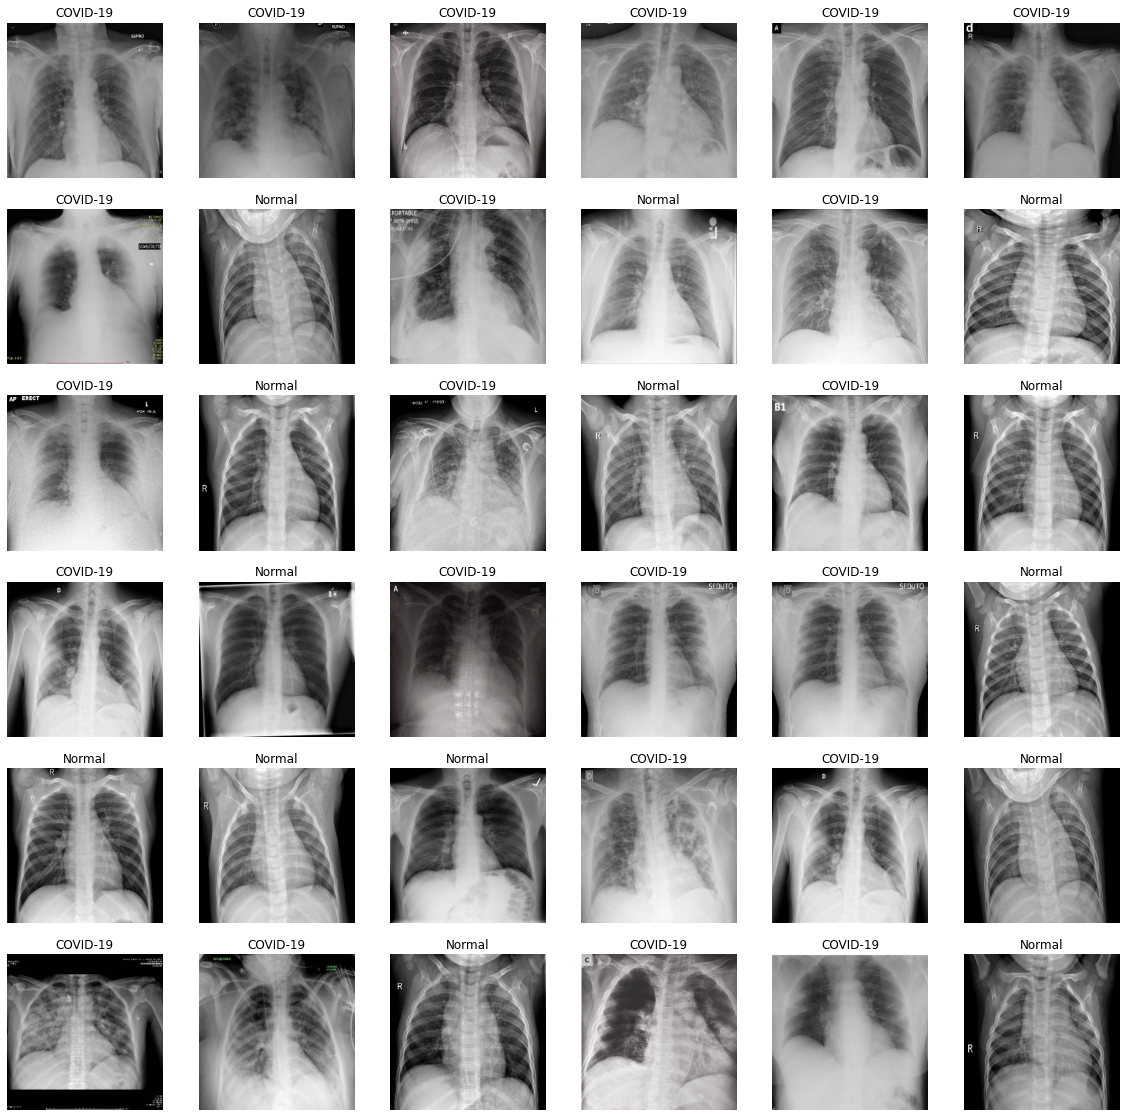

In [ ]:
plt.figure(figsize=(20,20))
# Escolhe de forma randomica imagem da lista X_train
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [ ]:
# constroi uma lista de imagens para teste
X_test = []
y_test = []
for folder in  os.listdir(testpath) :
    files = gb.glob(pathname= str(testpath + folder + '/*'))
    for file in files:
        image = cv2.imread(file)
        linha = np.size(image,0)
        coluna = np.size(image, 1)
        normalizedImg = np.zeros((linha,coluna))
        normalizedImg = cv2.normalize(image,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
        #filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        #sharpen_img_1 =cv2.filter2D(normalizedImg,-1,filter)
        image_array = cv2.resize(normalizedImg , (s,s))
        # Lista de imagens redimencionadas 300x300
        X_test.append(list(image_array))
        # Y lista de imagens redimencionadas 300x300 e atribui um codigo do dicionario de pneumonia
        y_test.append(code[folder])

In [ ]:
print(f'we have {len(X_test)} items in X_test')

we have 388 items in X_test


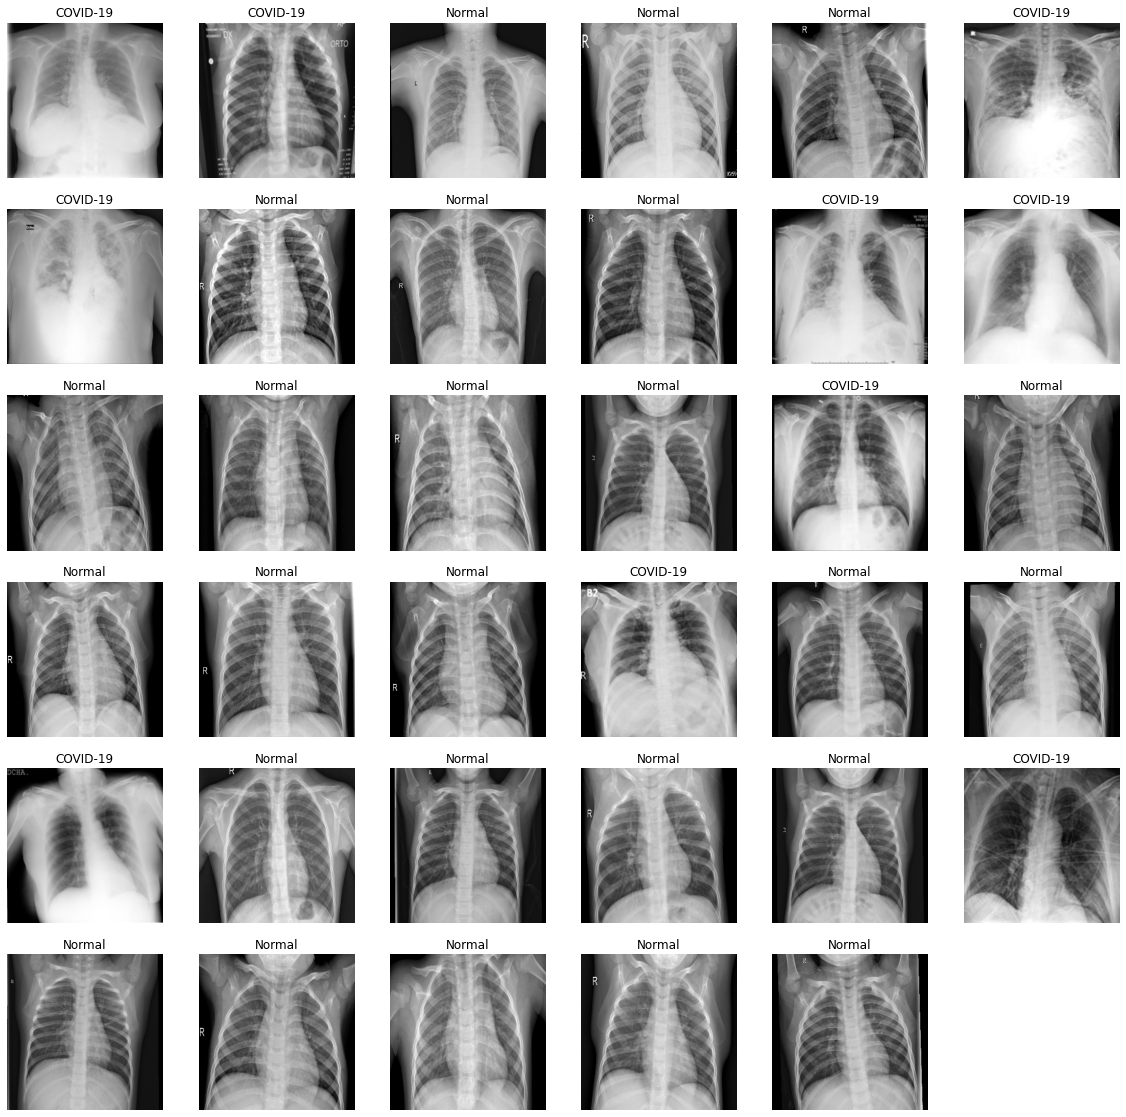

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),35))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [ ]:
# cria uma lista de imagens para predição
X_pred = []
files = gb.glob(pathname= str(predpath + 'rand/*'))
for file in files:
    image = cv2.imread(file)
    linha = np.size(image,0)
    coluna = np.size(image, 1)
    normalizedImg = np.zeros((linha,coluna))
    normalizedImg = cv2.normalize(image,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
    #filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    #sharpen_img_1 =cv2.filter2D(normalizedImg,-1,filter)
    image_array = cv2.resize(normalizedImg , (s,s))
    X_pred.append(list(image_array))

In [ ]:
print(f'Nós temos {len(X_pred)} items na Lista X_pred')

Nós temos 9 items na Lista X_pred


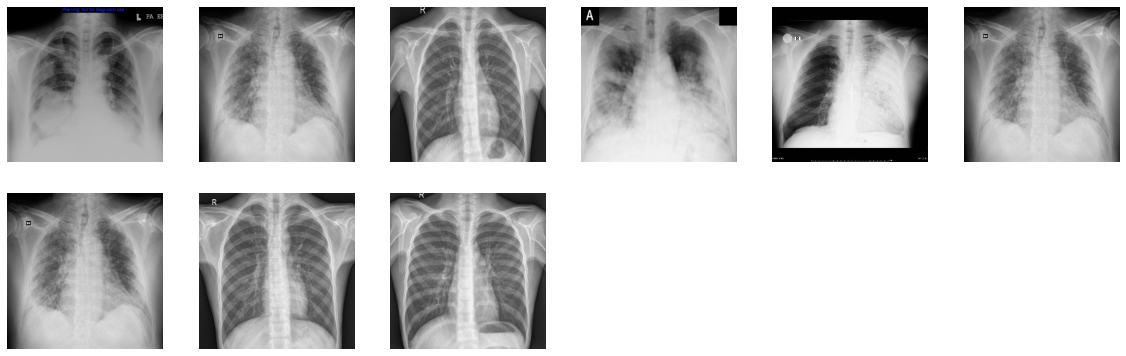

In [ ]:
# escolhe de forma randomica 36 imagens para predição
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),9))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])
    plt.axis('off')

In [ ]:
# pega as 36 imagens de treinamento
X_train = np.array(X_train)
# pega as 36 imagens de teste
X_test = np.array(X_test)
# pega as 36 imagens de predição
X_pred_array = np.array(X_pred)
# pega as imagens e atribui o dicionario
y_train = np.array(y_train)
# pega as imagens e atribui o dicionario
y_test = np.array(y_test)

print(f'X_train tem o formato {X_train.shape}')
print(f'X_test tem o formato {X_test.shape}')
print(f'X_pred tem o formato {X_pred_array.shape}')
print(f'y_train tem o formato {y_train.shape}')
print(f'y_test tem o formato {y_test.shape}')

X_train tem o formato (238, 300, 300, 3)
X_test tem o formato (388, 300, 300, 3)
X_pred tem o formato (9, 300, 300, 3)
y_train tem o formato (238,)
y_test tem o formato (388,)


In [ ]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(32, padding='same', kernel_size=(5,5),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(64, padding='same',kernel_size=(5,5),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(128, padding='same', kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(256, padding='same', kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(300,activation='relu'),
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(6,activation='softmax'),
        ])

In [ ]:
modelo2 = tf.keras.models.sequencial()

In [ ]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 300, 300, 32)      2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 300, 300, 64)      51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (Non

In [ ]:
#epochs = 150
epochs = 15
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs, batch_size=4, verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/15
48/48 [==============================] - 248s 5s/step - loss: 16.8953 - accuracy: 0.8053 - val_loss: 10.7366 - val_accuracy: 0.3333
Epoch 2/15
48/48 [==============================] - 246s 5s/step - loss: 0.3559 - accuracy: 0.9316 - val_loss: 5.7161 - val_accuracy: 0.3333
Epoch 3/15
48/48 [==============================] - 243s 5s/step - loss: 0.1824 - accuracy: 0.9632 - val_loss: 4.7827 - val_accuracy: 0.3333
Epoch 4/15
48/48 [==============================] - 243s 5s/step - loss: 0.0230 - accuracy: 0.9947 - val_loss: 9.8072 - val_accuracy: 0.3125
Epoch 5/15
48/48 [==============================] - 244s 5s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 6.9079 - val_accuracy: 0.3333
Epoch 6/15
48/48 [==============================] - 245s 5s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 10.2882 - val_accuracy: 0.3125
Epoch 7/15
48/48 [==============================] - 248s 5s/step - loss: 2.7943e-05 - accuracy: 1.0000 - val_loss: 10.4994 - val_accuracy: 0.3125
Epoch

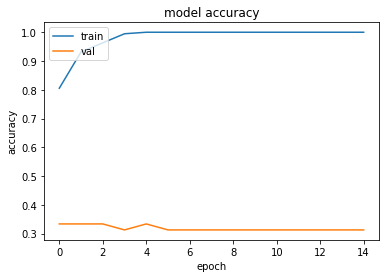

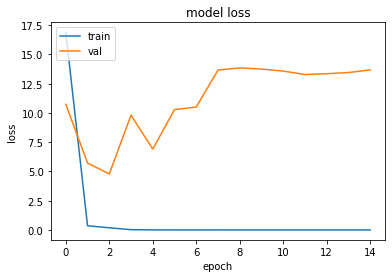

13/13 [==============================] - 93s 7s/step - loss: 0.5239 - accuracy: 0.9459
Test Loss is 0.5239199995994568
Test Accuracy is 0.9458763003349304
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab_Notebooks/ImagensRede/ModeloNormalizado95Acuracy15x.h5py/assets
Saved model to disk


In [ ]:
#  "Accuracy"
plt.plot(ThisModel.history['accuracy'])
plt.plot(ThisModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# "Loss"
plt.plot(ThisModel.history['loss'])
plt.plot(ThisModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)


print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))


#np.save(KerasModel)
 #serialize weights to HDF5
#KerasModel.save_weights("/content/drive/MyDrive/Colab_Notebooks/ImagensRede/CNN_modelSharpen15.h5py")
model3 = KerasModel.save('/content/drive/MyDrive/Colab_Notebooks/ImagensRede/ModeloNormalizado95Acuracy15x.h5py')
print("Saved model to disk")

In [ ]:
modelo_salvo = keras.models.load_model('')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

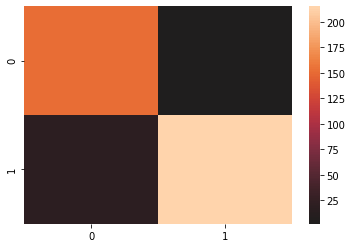

In [ ]:
y_pred = KerasModel.predict(X_test, verbose=0)
yhat_probs = KerasModel.predict_classes(X_test, verbose=0)
print(y_test)
print(yhat_probs)
print('=========================================')

f1_score(y_test, yhat_probs, average='weighted')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_probs ,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_probs, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_probs, average='weighted')
print('F1 score: %f' % f1)

print('=========================================')
print('Prediction Shape is {}'.format(y_pred.shape))
print('test Shape is {}'.format(y_test.shape))

cn = confusion_matrix(y_test, yhat_probs)
sn.heatmap(cn, center = True)
plt.show()

In [ ]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (9, 6)


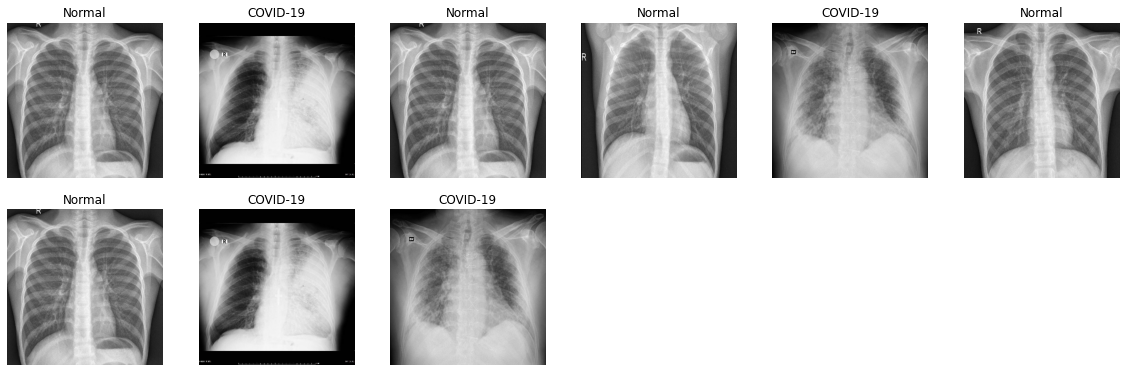

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),9))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))

In [ ]:
new_model = load_model('sample_data/modelo1.h5py')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 64)      51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0

In [ ]:
def predict_image(filename):
    img = load_img(filename, target_size=(s, s))
    image = keras.preprocessing.image.img_to_array(img)
    print(image)
    image = image / 255.0
    image = cv2.resize(image , (s,s))
    model = KerasModel.load_model('sample_data/modelo1.h5py')
    prediction = model.predict(image)
    print(prediction)
    plt.imshow(img)
    if prediction[0] > 0.5:
        stat = prediction[0] * 100
        print("This image is %.2f percent %s" % (stat, "COVID-19"))

    else:
        stat = (1.0 - prediction[0]) * 100
        print("This image is %.2f percent %s" % (stat, "Normal"))

In [ ]:
imagem = cv2.imread('sample_data/IM-0021-0001.jpeg')

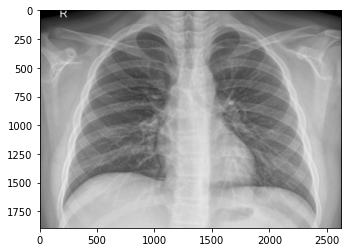

In [ ]:
plt.imshow(imagem)
plt.show()

In [ ]:
predict_image(imagem)

TypeError: ignored